In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

# Print the column names to verify the correct label column
print(df.columns)

# No sampling required since dataset is small enough.
X = df.drop('6', axis=1)  # Features (pixels) - Dropping the actual label column
y = df['6']               # Labels (digits) - Selecting the actual label column

Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)


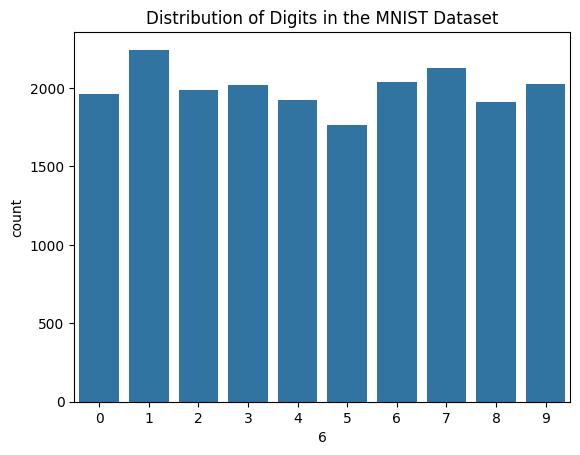

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
count,19999.000000,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,19999.0,...,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.0,19999.0,19999.0,19999.0
mean,4.470124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215011,0.087704,0.036502,0.013651,0.032602,0.006000,0.0,0.0,0.0,0.0
std,2.892807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.314821,3.921664,2.712527,0.950818,2.718102,0.600333,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,253.000000,79.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of digit classes
sns.countplot(x=y)
plt.title('Distribution of Digits in the MNIST Dataset')
plt.show()

# Display summary statistics for pixel values
df.describe()

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the pixel values (0-255 to 0-1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Check the shape of the scaled data
X_scaled.shape

(19999, 784)

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
model_svm = SVC()
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

SVM Accuracy: 96.45%


In [7]:
from sklearn.neural_network import MLPClassifier

# Train a Neural Network (MLP)
model_mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300)
model_mlp.fit(X_train, y_train)

# Make predictions
y_pred_mlp = model_mlp.predict(X_test)

# Evaluate accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Accuracy: {accuracy_mlp * 100:.2f}%")

Neural Network Accuracy: 96.73%


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       377
           1       0.97      0.99      0.98       436
           2       0.97      0.97      0.97       390
           3       0.97      0.96      0.96       406
           4       0.96      0.97      0.97       401
           5       0.97      0.96      0.96       341
           6       0.98      0.99      0.98       412
           7       0.96      0.97      0.97       438
           8       0.96      0.95      0.96       384
           9       0.96      0.93      0.95       415

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       377
           1       0.98      0.99      0.98       436
           2       0.95      0.97      0.96       390
           3       0.97 

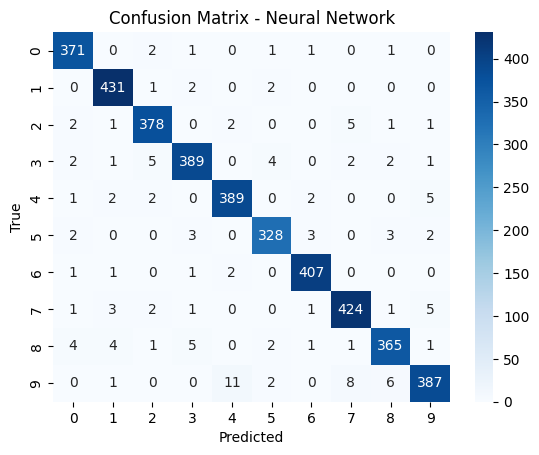

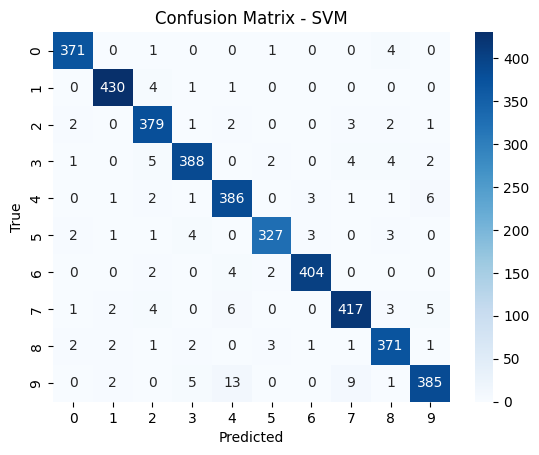

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for Neural Network (MLP)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(classification_report(y_test, y_pred_svm))

# Visualize confusion matrix for MLP
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Visualize confusion matrix for SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()